In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

df = yf.download("AAPL GE MSFT", start="2022-01-03", end = "2022-12-31")
print(df)

[*********************100%%**********************]  3 of 3 completed

Price        Adj Close                              Close             \
Ticker            AAPL         GE        MSFT        AAPL         GE   
Date                                                                   
2022-01-03  179.481125  59.306904  328.120880  182.009995  59.959145   
2022-01-04  177.203186  61.235729  322.494568  179.699997  61.909184   
2022-01-05  172.489639  61.235729  310.114655  174.919998  61.909184   
2022-01-06  169.610184  61.593147  307.664185  172.000000  62.270535   
2022-01-07  169.777832  62.486698  307.820984  172.169998  63.173908   
...                ...        ...         ...         ...        ...   
2022-12-23  130.782578  50.674385  236.195023  131.860001  50.956551   
2022-12-27  128.967529  51.324924  234.443832  130.029999  51.610718   
2022-12-28  125.010124  50.785908  232.039627  126.040001  51.068691   
2022-12-29  128.550964  51.888729  238.450821  129.610001  52.177662   
2022-12-30  128.868332  51.913513  237.273453  129.929993  52.20

In [3]:
#keep only adjusted close price

df = df.iloc[: , :3]
df.columns = ["Apple", "Gen Elect", "Microsoft"]
print(df)

                 Apple  Gen Elect   Microsoft
Date                                         
2022-01-03  179.481125  59.306904  328.120880
2022-01-04  177.203186  61.235729  322.494568
2022-01-05  172.489639  61.235729  310.114655
2022-01-06  169.610184  61.593147  307.664185
2022-01-07  169.777832  62.486698  307.820984
...                ...        ...         ...
2022-12-23  130.782578  50.674385  236.195023
2022-12-27  128.967529  51.324924  234.443832
2022-12-28  125.010124  50.785908  232.039627
2022-12-29  128.550964  51.888729  238.450821
2022-12-30  128.868332  51.913513  237.273453

[251 rows x 3 columns]


## Returns

Calculate the returns from prices, and then calculate Expected Return, Risk and Covariance between assets.

We are investing in three stocks in the US Market: Apple Inc. (AAPL), General Electric Company (GE), Microsoft Corporation (MSFT). From the preparation above, we have daily adjusted closing prices from Jan 03, 2022 to Dec 31, 2022 of the three stocks downloaded from finance.yahoo.com

Compute the returns using the following formula:
$$R_t = \frac{AdjP_t-AdjP_{t-1}}{AdjP_{t-1}}$$

Adjusted closing price is the price of the stock taking into account dividends, stock splits and new stock offerings.

In [4]:
df.pct_change()

,Apple,Gen Elect,Microsoft
Date,,,
2022-01-03,NaN,NaN,NaN
2022-01-04,-0.012692,0.032523,-0.017147
2022-01-05,-0.026600,0.000000,-0.038388
2022-01-06,-0.016693,0.005837,-0.007902
2022-01-07,0.000988,0.014507,0.000510
...,...,...,...
2022-12-23,-0.002798,0.000245,0.002267
2022-12-27,-0.013878,0.012838,-0.007414
2022-12-28,-0.030685,-0.010502,-0.010255


## Plot the shares

                 Apple  Gen Elect   Microsoft
Date                                         
2022-01-03  179.481125  59.306904  328.120880
2022-01-04  177.203186  61.235729  322.494568
2022-01-05  172.489639  61.235729  310.114655
2022-01-06  169.610184  61.593147  307.664185
2022-01-07  169.777832  62.486698  307.820984
...                ...        ...         ...
2022-12-23  130.782578  50.674385  236.195023
2022-12-27  128.967529  51.324924  234.443832
2022-12-28  125.010124  50.785908  232.039627
2022-12-29  128.550964  51.888729  238.450821
2022-12-30  128.868332  51.913513  237.273453

[251 rows x 3 columns]


<Axes: xlabel='Date'>

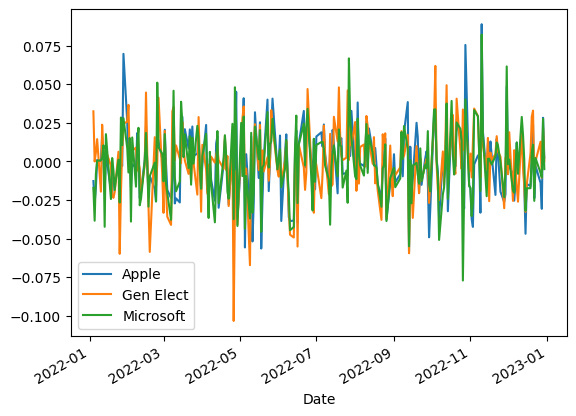

In [5]:
print(df)

daily_ret = df.pct_change()
daily_ret.plot()

## Expected Returns, Standard Deviation, and Covariances

We are measuring risk(volatility) by standard deviation.
1. Expected return of each stock is estimated as the sample mean (average) of stock returns: $$\bar R =\sum_{t=1}^{T}\frac{R_{t}}{T}$$
2. Variance of each stock is estimated as: $$\sigma^{2} = \sum_{t=1}^{T}\frac{R_{i}-\bar R}{T-1}$$
3. Standard deviation of each stock is estimated by taking the square root of the variances. $$\sigma = \sqrt{\sigma^{2}}$$
4. Make the variance-covariance matrix of the thre stocks. Variance-covariance matrix contains variances and covariances, basically what we need to compute portfolio-variance.

\begin{array}{cccc}
\hline\hline
\textbf{} & \textbf{AAPLE} & \textbf{GELECT} & \textbf{MSOFT} \\ 
\hline
\textbf{AAPLE} & \sigma^2_{APPLE} & \sigma_{APPLE, GELECT} & \sigma_{APPLE, MSOFT}  \\ 
\textbf{GELECT} & \sigma_{APPLE, GELECT} & \sigma^2_{GELECT} & \sigma_{GELECT, MSOFT}  \\ 
\textbf{MSOFT} & \sigma_{APPLE, MSOFT} & \sigma_{GELECT, MSOFT} & \sigma^2_{MSOFT}  \\ 
\hline \hline
\end{array}

We have already estimated the variances and we use the following formula to estimate the covariances:
$$ cov(R^{1}, R^{2}) = \sum_{t=1}^{T}\frac{(R^{1}_{t} - \bar R_{1})(R^{2}_{t} - \bar R^{2})}{T-1} $$

In [6]:
#Summary statistics 

sum_stats = {
    'Mean': daily_ret.mean() *252,
    'Var': daily_ret.var() * 252,
    'Std': daily_ret.std() * (252 ** 0.5)
}

#Create a DataFrame from the dictionary
sum_stats = pd.DataFrame(sum_stats)

#Print the DataFrame
print(sum_stats)

               Mean       Var       Std
Apple     -0.270522  0.127250  0.356721
Gen Elect -0.072807  0.122068  0.349383
Microsoft -0.264223  0.125191  0.353823


In [7]:
cov_mat = daily_ret.cov() * 252
cov_mat

,Apple,Gen Elect,Microsoft
Apple,0.127250,0.068930,0.104116
Gen Elect,0.068930,0.122068,0.059948
Microsoft,0.104116,0.059948,0.125191


## Risk and Return of a Portfolio

We calculate the risks and return of a portfolio, the weights of AAPL, GE and MSFT are 0.2, 0.5 and 0.3 respectively.

1. Portfolio consistes of three stocks. The portfolio return is computed as follows: $$ E(R_{P}) = w_{1}E(R_{1}) + w_{2}E(R_{2}) + w_{3}E(R_{3}) $$
Lets define vector $ \mathbf{w} = [w_{1}, w_{2}, w_{3}] $ and the expected return   vector $ E(\mathbf(R)) = [E(R_{1}), E(R_{2}), E(R_{3})] $, the portfolio return is: $$ E(R_{P}) = \mathbf{w}E(\mathbf{R})^{'} $$

2. Let's define $\Sigma$ as the covariance matrix of the three stocks and $\mathbf{w}$ is the vector of weights (the portion of wealth invested in each stock). The portfolio variance is: $$ \sigma^{2}_{P} =\mathbf{w}\Sigma \mathbf{w}^{'} $$ It looks like: $$ \sigma^{2}_{P} = \begin{bmatrix} w_{1} & w_{2} & w_{3} \end{bmatrix} \begin{bmatrix} \sigma^{2}_{1} & \sigma_{12} & \sigma_{13}\\ \sigma_{21} & \sigma^{2}_{2} & \sigma_{23}\\ \sigma_{31} & \sigma_{32} & \sigma^{2}_{3}\\ \end{bmatrix} \begin{bmatrix} w_{1} \\ w_{2} \\ w_{3} \end{bmatrix} $$ $$ = w_(1)^{2}\sigma_{1}^{2} + w_{2}^{2}\sigma_{2}^{2} + w_{3}^{2}\sigma_{3}^{2} + 2w_{1}w_{2}\sigma_{2} + 2w_{2}w_{3}\sigma_{23} +  2w_{1}w_{3}\sigma_{13} $$

3. We consider a portfolio with this vector of weights: $w_{1} = 0.2$, $w_{2}= 0.5$, and $w_{1} = 0.3$. Compute the expected return on this portfolio using the vector of expected returns for each stock and the vector of weights invested in each stock.

In [8]:
sum_stats.Mean

Apple       -0.270522
Gen Elect   -0.072807
Microsoft   -0.264223
Name: Mean, dtype: float64

In [9]:
weight = [0.2, 0.5, 0.3]

#portfolio mean
port_ret = weight@sum_stats.Mean
port_ret

-0.16977477369294172

In [10]:
weight@cov_mat@weight

0.09113859124323373

In [11]:
(weight@cov_mat@weight)**0.5

0.3018916879333277

In [12]:
port_stats = np.array([
    weight@sum_stats.Mean,
    weight@cov_mat@weight,
    (weight@cov_mat@weight)**0.5])

port_stats

array([-0.16977477,  0.09113859,  0.30189169])

## Risk-Return Space
Let's start making a large set of portfolios and see how the risk-return combination looks like in risk-return space. To implement this step, we are going to build a large set of portfolios and therefore, we need to generate a large set of weights. Weights invested in the portfolio can be anything basically. We should only make sure that we don't invest more than we have. Therefore, we should make sure $\mathbf{1w^{'}} = 1$. Weights can also be constrained to be positive ($ w_{i}>0$) when we want to apply no short-selling constraint.

1. We already have the expected returns and risk for the stocks. Let's generate a large set of stocks' weights with constraint $ \mathbf{1w^{'}=1}$
2. Let's keep the weight values, for simplicity, between -1 and 1. As we already know the negative values represent the short-selling cases and the positive values represent the buying cases.
3. In order to generate a random value between 0 and 1, we use the function $\textbf{np.random.rand().}$ Use this function to get $ w_{1}$ and $w_{2}$. For $w_{3}$ use $ 1-w_{1}-w_{2}$. This will make sure that the summation of portfolio weights is 1 and thereby, the constraint $ \mathbf{1w^{'}}=1$ holds. Generate a sample of 2000 rows of protfoio weights.
4. Compute portfolio expected return and variance for each row of weights (or vector of weights).
5. Compute the standard deviation using the function $\textbf{np.std().}$
6. Now, we have different possible portfolios, and we have the portfolio expected returns and risk (in our case, it is measured by standard deviation).
7. Use plot function to create a scatter chart of risk and return. Consider the standard deviation of the portfolios as the X-axis and the Expected Return of the portfolios as the Y-axis.

In [13]:
2*np.random.rand(1,1)-1

array([[-0.3650762]])

In [14]:
weight = 2*np.random.rand(100000,2) -1
weight = pd.DataFrame(weight)
weight


,0,1
0,-0.542658,0.913353
1,0.766346,-0.417591
2,0.057929,0.650238
3,0.616654,0.273546
4,0.013481,0.087231
...,...,...
99995,0.029419,-0.107803
99996,-0.852349,0.534507
99997,0.145812,0.510431
99998,-0.201122,-0.036548


In [15]:
weight.columns = ['weight1', 'weight2']
weight['weight3'] = 1- weight['weight1'] - weight['weight2']
weight = weight.query('weight3 >= -1 & weight3 <= 1')
weight

,weight1,weight2,weight3
0,-0.542658,0.913353,0.629305
1,0.766346,-0.417591,0.651245
2,0.057929,0.650238,0.291833
3,0.616654,0.273546,0.109799
4,0.013481,0.087231,0.899288
...,...,...,...
99989,0.756141,0.948261,-0.704402
99990,0.715652,0.989156,-0.704807
99994,-0.145708,0.797428,0.348280
99997,0.145812,0.510431,0.343756


In [16]:
weight = np.array(weight)
weight@sum_stats.Mean

array([-0.08597424, -0.34898384, -0.14012182, ..., -0.11066456,
       -0.16743668, -0.09472539])

## Section 2

In this section we'll create:
1. Minimum variance portfolio
2. Efficient frontier with short-selling constraint and no risk-free lending and borrowing
3. Efficient frontier without short-selling constraint and no risk-free lending and borrowing
4. Efficient frontier without short-selling constraint and also with risk-free lending and borrowing

In [17]:
df = yf.download("AAPL GE MSFT", start="2022-01-03", end="2022-12-31")

[*********************100%%**********************]  3 of 3 completed


In [18]:
df

Price        Adj Close                              Close             \
Ticker            AAPL         GE        MSFT        AAPL         GE   
Date                                                                   
2022-01-03  179.481125  59.306904  328.120880  182.009995  59.959145   
2022-01-04  177.203186  61.235729  322.494568  179.699997  61.909184   
2022-01-05  172.489639  61.235729  310.114655  174.919998  61.909184   
2022-01-06  169.610184  61.593147  307.664185  172.000000  62.270535   
2022-01-07  169.777832  62.486698  307.820984  172.169998  63.173908   
...                ...        ...         ...         ...        ...   
2022-12-23  130.782578  50.674385  236.195023  131.860001  50.956551   
2022-12-27  128.967529  51.324924  234.443832  130.029999  51.610718   
2022-12-28  125.010124  50.785908  232.039627  126.040001  51.068691   
2022-12-29  128.550964  51.888729  238.450821  129.610001  52.177662   
2022-12-30  128.868332  51.913513  237.273453  129.929993  52.202583   

Price                         High                                Low  \
Ticker            MSFT        AAPL         GE        MSFT        AAPL   
Date                                                                    
2022-01-03  334.750000  182.880005  60.706764  338.000000  177.710007   
2022-01-04  329.010010  182.940002  62.332836  335.200012  179.119995   
2022-01-05  316.380005  180.169998  63.416885  326.070007  174.639999   
2022-01-06  313.880005  175.300003  62.974545  318.700012  171.639999   
2022-01-07  314.040009  174.139999  63.697243  316.500000  171.029999   
...                ...         ...        ...         ...         ...   
2022-12-23  238.729996  132.419998  51.330360  238.869995  129.639999   
2022-12-27  236.960007  131.410004  51.766472  238.929993  128.720001   
2022-12-28  234.529999  131.029999  51.816311  239.720001  125.870003   
2022-12-29  241.009995  130.479996  52.277344  241.919998  127.730003   
2022-12-30  239.820007  129.949997  52.352108  239.960007  127.430000   

Price                                    Open                         \
Ticker             GE        MSFT        AAPL         GE        MSFT   
Date                                                                   
2022-01-03  59.030846  329.779999  177.830002  59.323666  335.350006   
2022-01-04  61.111725  326.119995  182.630005  61.541607  334.829987   
2022-01-05  61.859344  315.980011  179.610001  62.133472  325.859985   
2022-01-06  61.940334  311.489990  172.699997  62.582043  313.149994   
2022-01-07  62.158394  310.089996  172.889999  62.177082  314.149994   
...               ...         ...         ...        ...         ...   
2022-12-23  50.439445  233.940002  130.919998  50.906708  236.110001   
2022-12-27  51.025082  235.830002  131.380005  51.087383  238.699997   
2022-12-28  50.651272  234.169998  129.669998  51.704170  236.889999   
2022-12-29  51.087383  235.649994  127.989998  51.243137  235.649994   
2022-12-30  51.573338  236.660004  128.410004  51.654327  238.210007   

Price          Volume                      
Ticker           AAPL        GE      MSFT  
Date                                       
2022-01-03  104487900   7415209  28865100  
2022-01-04   99310400  12237390  32674300  
2022-01-05   94537600   9461542  40054300  
2022-01-06   96904000   6864983  39646100  
2022-01-07   86709100  10029103  32720000  
...               ...       ...       ...  
2022-12-23   63814900   5286213  21207000  
2022-12-27   69007800   6804792  16688600  
2022-12-28   85438400   6210907  17457100  
2022-12-29   75703700   7088733  19770700  
2022-12-30   77034200   6625342  21938500  

[251 rows x 18 columns]

In [19]:
df = df.iloc[:, :3]
df.columns = ['APPLE', 'GELECT', 'MSOFT'] #rename columns
daily_ret = df[['APPLE', 'GELECT', 'MSOFT']].pct_change() #construct daily % returns 

daily_ret


,APPLE,GELECT,MSOFT
Date,,,
2022-01-03,NaN,NaN,NaN
2022-01-04,-0.012692,0.032523,-0.017147
2022-01-05,-0.026600,0.000000,-0.038388
2022-01-06,-0.016693,0.005837,-0.007902
2022-01-07,0.000988,0.014507,0.000510
...,...,...,...
2022-12-23,-0.002798,0.000245,0.002267
2022-12-27,-0.013878,0.012838,-0.007414
2022-12-28,-0.030685,-0.010502,-0.010255


In [20]:
# Summary statistics for calculations

sum_stats = {
    'Mean' : daily_ret.mean() *252,
    'Var': daily_ret.var() * 252,
    'Std': daily_ret.std() * (252**0.5)}

sum_stats = pd.DataFrame(sum_stats)
sum_stats

,Mean,Var,Std
APPLE,-0.270522,0.127250,0.356721
GELECT,-0.072807,0.122068,0.349383
MSOFT,-0.264223,0.125191,0.353823


In [21]:
cov_mat = daily_ret.cov() * 252
cov_mat

,APPLE,GELECT,MSOFT
APPLE,0.127250,0.068930,0.104116
GELECT,0.068930,0.122068,0.059948
MSOFT,0.104116,0.059948,0.125191


## Optimization Problem

$$ \min_{x,y,z} f(x,y,z) = \frac{1}{xyz} $$  $$ s.t. \mathbf{x+y+z} = 1$$ $$ \mathbf{x,y,z} > 0$$ 

In [22]:
from scipy.optimize import minimize

In [23]:
#Now find the minimize value of f(x,y,z) = 1/xyz
#With constraint that: x,y,z > 0, and x+y+z = 1

#e = 1e-10 #we create a very small positive real number here

#define the objective function: f(x,y,z) = 1/xyz
f = lambda x: 1/(x[0]*x[1]*x[2])

#define the constraints:
cons = ({'type':'eq', 'fun': lambda x:x[0] + x[1] + x[2] -1}, #constarint: x+y+z=1
        {'type': 'ineq', 'fun': lambda x:x[0] },             #constraint: x,y,z>0
        {'type': 'ineq', 'fun': lambda x:x[1] },
        {'type': 'ineq', 'fun': lambda x:x[2] })

x0 = np.array((0.33, 0.33, 0.33)) #set initial values of x, y, z
res = minimize(f, x0, constraints = cons)
print(res)
print('Result from optimization:', res.x)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 27.00000000001841
       x: [ 3.333e-01  3.333e-01  3.333e-01]
     nit: 2
     jac: [-8.100e+01 -8.100e+01 -8.100e+01]
    nfev: 8
    njev: 2
Result from optimization: [0.33333349 0.33333349 0.33333302]


In [24]:
print(res.fun)

27.00000000001841


In [25]:
#To generate many portfolios with random weights

np.random.seed(42)
weight = 2*np.random.rand(10000,2)-1
weight = pd.DataFrame(weight)

weight.columns = ['weight1', 'weight2']
weight['weight3'] = 1- weight['weight1'] - weight['weight2']
weight = weight.query ('weight3 >= -1 & weight3 <= 1')

print(weight)

       weight1   weight2   weight3
0    -0.250920  0.901429  0.349491
1     0.463988  0.197317  0.338695
4     0.202230  0.416145  0.381625
6     0.664885 -0.575322  0.910436
12   -0.087860  0.570352  0.517508
...        ...       ...       ...
9992 -0.320860  0.791123  0.529736
9993 -0.148366  0.579531  0.568835
9994 -0.526713  0.897602  0.629111
9995  0.149156  0.518647  0.332196
9997  0.802077  0.754077 -0.556154

[5018 rows x 3 columns]


In [26]:
#Calculate the portfolio return and risk for each set of weights accordingly:

asset_ret = np.array(sum_stats.Mean)
cov_mat = np.array(cov_mat)

port_ret = weight.dot(asset_ret)
port_risk = port_ret * 0  #generate null values for portfolio risk

for i in range (len(port_risk)):
    port_weight = weight.iloc[i]
    port_risk.iloc[i] = port_weight@cov_mat@port_weight

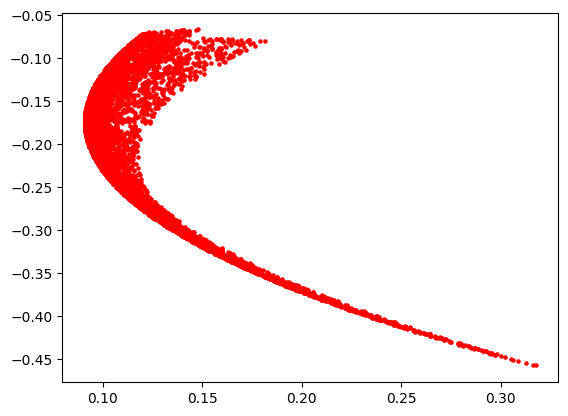

In [27]:
import matplotlib.pyplot as plt
plt.scatter(port_risk, port_ret, color = 'red', marker='o', s=5)

## The Minimum-Variance portfolio with no short-selling capability

Start with investing the minimum-variance portfolio with no short selling.

1. We have prepared the variance-covariance matrix, that shows the covariances between  three stocks, AAPL, GE, and MSFT, in the variable ret_cov. Moreover, we also have the Expected return and Standard deviation of these individual stocks in the variable sum_stats.
2. Now, we want to find the minimum variance portfolio, so we want to solve the following problem:
     $$ \min_{\mathbf{w}} \sigma^{2}_{P} = \mathbf{w\Sigma w'} $$ $$s.t. \mathbf{w1^{'}} = 1$$ $$\mathbf{w} >0 $$
3. We need to optimize (minimization in this case). There are many ways to solve the optimization problems with constraints.
4. Intuitively, the more random portfolio weights we generate, the more precise minimum variance weights we get. Here we can just generate 10,000 random portfolio weights.
5. Draw the scatter plot of all the weights simulation and indicate the weights yields to the minimum variance portfolio. 

In [28]:
#Generate a large amount of random weights for the first three assets, i.e., 10000 weights
#Normalize them so that sum of all weights equal one

np.random.seed(42)

weight = np.random.rand(10000, 3)
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
weight['weight_sum'] = weight['weight1'] + weight['weight2'] + weight['weight3']
weight['weight1'] = weight['weight1']/weight['weight_sum']
weight['weight2'] = weight['weight2']/weight['weight_sum']
weight['weight3'] = weight['weight3']/weight['weight_sum']
weight = weight.iloc[:, :3]

#now we have 10000 random generated portfolio weights
#Let's calculate the portfolio returns

asset_ret = np.array(sum_stats.Mean)
port_ret = weight.dot(asset_ret)

#Then we calculate the portfolio risks(std)
cov_mat = np.array(cov_mat)
weight = np.array(weight)
port_std = (np.diag(weight@cov_mat@weight.T))

#Putting the portfolio return, risk, and the weight of the assets in one dataframe:
portfolios = pd.DataFrame({'ret': port_ret, 'risk': port_std})
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
portfolios = portfolios.join(weight)

portfolios

,ret,risk,weight1,weight2,weight3
0,-0.176911,0.090939,0.182059,0.462129,0.355812
1,-0.235570,0.104741,0.657381,0.171323,0.171296
2,-0.155768,0.091922,0.038078,0.567845,0.394077
3,-0.264529,0.114043,0.416865,0.012119,0.571017
4,-0.235362,0.105238,0.678655,0.173111,0.148234
...,...,...,...,...,...
9995,-0.176423,0.094971,0.457985,0.473760,0.068255
9996,-0.224878,0.098176,0.390251,0.218388,0.391361
9997,-0.240231,0.108007,0.734031,0.149494,0.116475
9998,-0.172529,0.090912,0.136749,0.483532,0.379719


In [29]:
cov_mat = np.array(cov_mat)
asset_ret = np.array(asset_ret)

f = lambda x: x @ cov_mat @ x.T

x0 = np.array((0.33, 0.33, 0.33))   #Initial guess for portfolio weights

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, #Sum of weights constraints  
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]},
        {'type': 'ineq', 'fun': lambda x: x[2]})
res = minimize(f, x0, constraints=cons)

min_var_ret= res.x @ asset_ret
min_var_risk = res.fun

print("Minimum variance portfolio return: ", res.x@asset_ret)
print("Minimum variance portfolio function: ", res.fun)
print("Minimum variance portfolio risk: ", res.x)

Minimum variance portfolio return:  -0.1738012041304992
Minimum variance portfolio function:  0.0909012075637823
Minimum variance portfolio risk:  [0.15229587 0.47739511 0.37030902]


In [30]:
print(portfolios[portfolios.risk == portfolios.risk.min()])

          ret      risk   weight1   weight2   weight3
9675 -0.17426  0.090902  0.150446  0.474939  0.374615


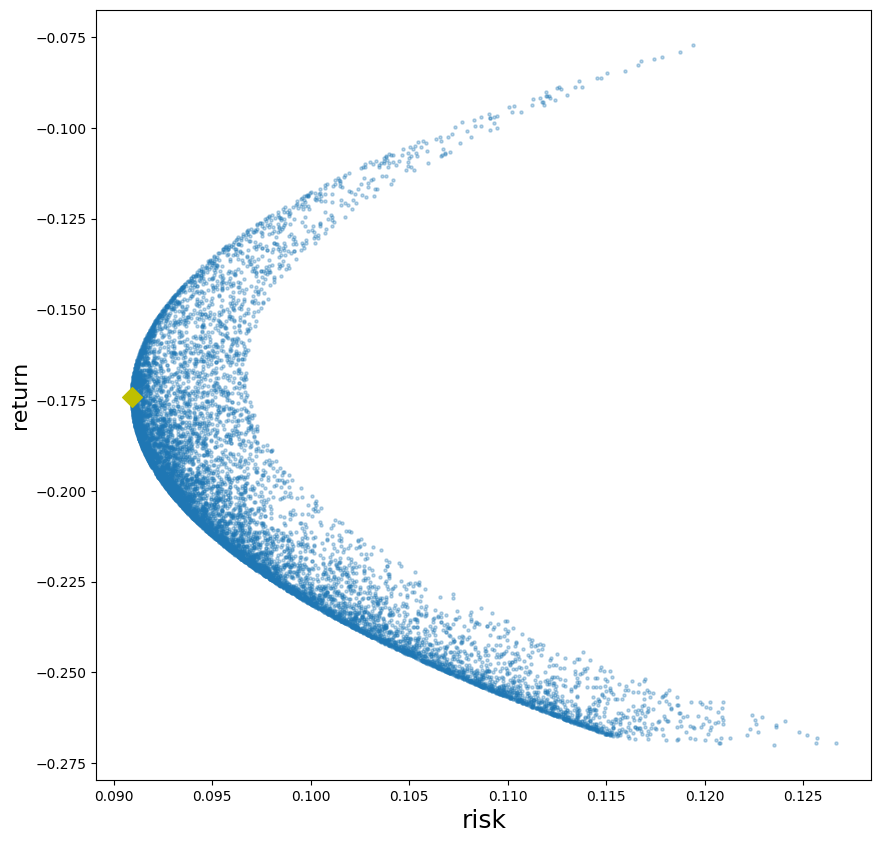

In [31]:
min_var_ret = portfolios.loc[portfolios['risk'].idxmin(), 'ret']
min_var_risk = portfolios.loc[portfolios['risk'].idxmin(), 'risk']

plt.subplots(figsize=[10,10])
plt.xlabel ('risk', fontsize =18)
plt.ylabel ('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker= 'o', s=5, alpha = 0.3)
plt.scatter(min_var_risk, min_var_ret, color='y', marker='D', s=100)
plt.show()

## Efficient frontier with no short-selling capability and no riskless lending and borrowing opportunity

1. Goal is to find the efficient frontier. The first step is to find the minimum-variance portfolio, which we already found in the previous section.
2. The next step is to solve the portfolio optimization problem for specified values of targeted portfolio return: $$ \min \sigma^{2}_{P} = \mathbf{w\sigma w'}$$ $$E(R_{P}) = R_{P}^{0} $$ $$ \mathbf{w1^{'}} = 1 $$ $$\mathbf{w}>0$$
3. We can solve this optimization problem using the 'minimize' function for every given portfolio return. We need to specify values for $R_{i}$, which is the targeted portfolio return. But what values can we give? The values should be between the portfolio return of minimum-variance of portfolio (that you already computed) and also the maximum portfolio return from simulation. We can artifically create 100 risk levels in this range as $R_{i}, i\in (1, 100)$

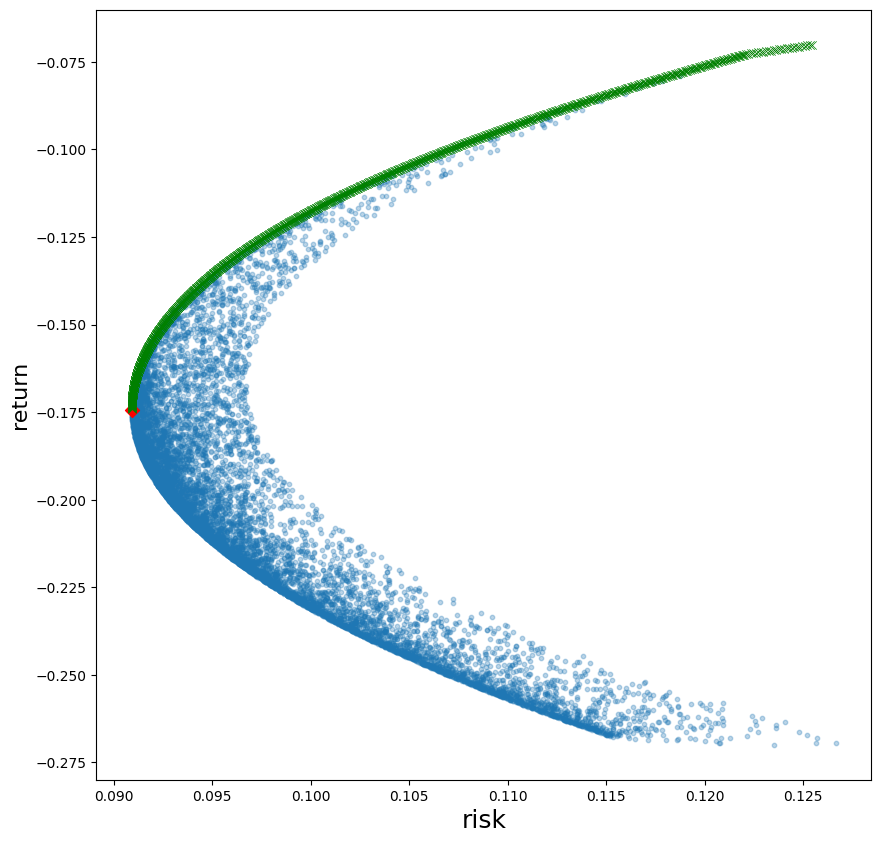

In [32]:
#first we generate the "grids" over portfolio returns:
#We want to calculate the minimum variance for all the point on the grids of portfolio return:

eff_ret = np.arange(-0.174, -0.07, (-0.07+0.174)/1000)
eff_risk = np.zeros(len(eff_ret))

#now we can use the minimize function over each point on "eff_risk":
cov_mat = np.array(cov_mat)
f = lambda x: x@cov_mat@x.T
x0 = np.array((1,1,1))

for ind in range(len(eff_ret)):
    #set the optimization problem constraints:
    cons = (
        {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1},
        {'type': 'eq', 'fun': lambda x: x@asset_ret - eff_ret[ind]},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]},
        {'type': 'ineq', 'fun': lambda x: x[2]})
    #find the minimum variance of the portfolio given certain return level
    res= minimize(f, x0, constraints=cons)
    eff_risk[ind] = res.fun

#eff_x and eff_y describe the risk and return combination on the efficient frontier
#Let's plot the efficient frontier:

plt.subplots(figsize= [10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(min_var_risk, min_var_ret, color='r', marker='D', s=50)
plt.scatter(eff_risk, eff_ret, color='g', marker='x', linestyle='-', linewidth=0.5)



4. Alternatively, we can use the Monte Carlo method again here to find the efficient frontier. The problem is equivalent to a maximization problem:
$$  \max E(R_{P}) = \mathbf{wE(R)} $$ $$\sigma^{2}_{i}$$ $$ \mathbf{w1^{'}}=1$$ $$\mathbf{w}>0)$$
5. We need to specify values for $\sigma^{2}_{i}$, which is the targeted portfolio risk. But what values can we give? The values should be between the portfolio risk of minimum-variance of portfolio (that we already computed) and also the maximum portfolio risk from simulation. We can artifically create 100 risk levels in this range as $\sigma^{2}_{i}, i\in (1,100)$.
6. For each value of $\sigma^{2}_{i}$, you need to find what is the highest return for the simulated portfolio with the risk level not higher than $\sigma^{2}_{i}$. After this we will have a combination of different risk levels and under which the best return we can get. Plot these combinations on the previous grapgh to the efficient frontier.

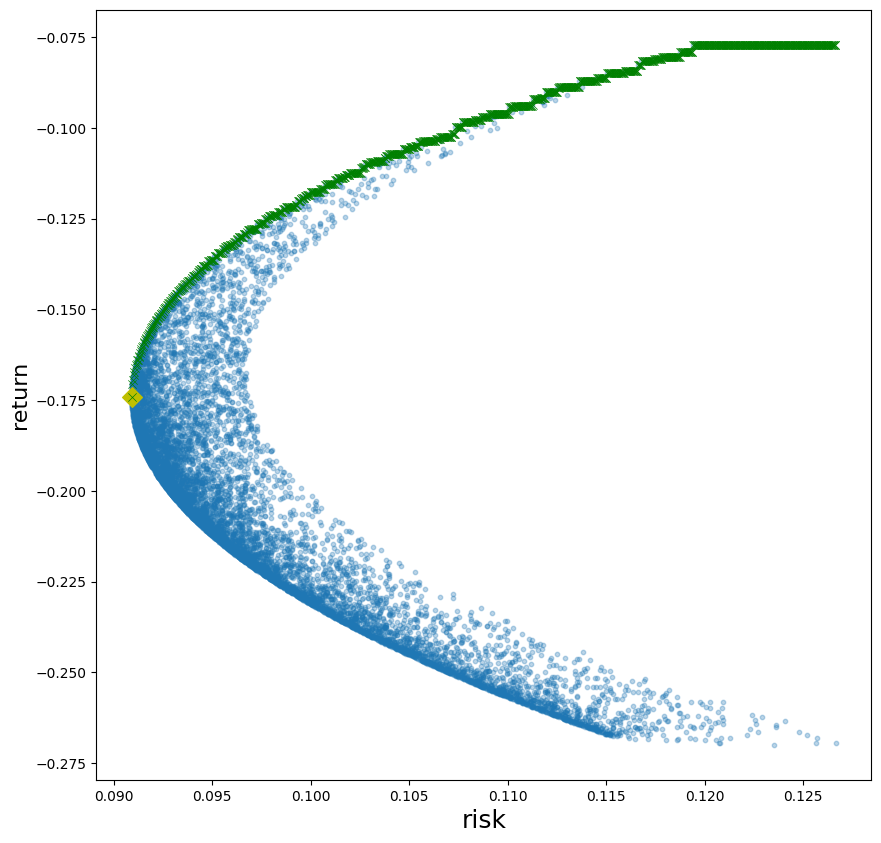

In [33]:
#We want to find the 'efficient' portfolios in our 10,000 random simulations
#Those portfolios will resemble the efficient frontier

#first we want to create a list of certain risk levels
#then we want to check given this risk level, what is the best portfolio return we get from simulations

eff_x = np.arange(portfolios.risk.min(), portfolios.risk.max(),
                 (portfolios.risk.max()-portfolios.risk.min())/1000)
eff_y=np.zeros(len(eff_x))

for ind in range(len(eff_x)):
    #find the highest return of the portfolio given certain risk level
    eff_y[ind-1] = portfolios.loc[portfolios.risk <= eff_x[ind-1], 'ret'].max()


plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(min_var_risk, min_var_ret, color='y', marker='D', s=100)
plt.scatter(eff_x, eff_y, color='g', marker='x', linestyle='-', linewidth=0.5)


## Short-selling is allowed 

Now we construct the efficient frontier with short-selling and no risk-free lending and borrowing.

1. We want to find the efficient frontier with short-selling. First, let's look at the problem:
   $$ \min \sigma^{2}_{P}=\mathbf{w\sigma w'}$$ $$E(R_{P})= R_{P}^{0}$$ $$\mathbf{w1^{'}}=1$$
2. So, now, there is no limit on the weights. They can be anything but we cant spend more than what we have, and that's why we still have $\mathbf{w1^{'}}=1$.
3. Our goal is the same as before. Use either optimization problem sover, or Monte-Carlo Simulation, with non-negative constraints. Draw the efficient frontier with scatter plot.

In [34]:
#Generate a large amount of random weights for the first three assets, i.e., 10000 weights
#normalize them so that sum of all weights equal one

np.random.seed(42)
weight = np.random.normal(size=(10000, 2))
weight = pd.DataFrame(weight)
weight.columns = ['w1', 'w2']
weight['w3'] = 1- weight['w1'] - weight['w2']

#calculate the portfolio risk and return
asset_ret = np.array(sum_stats.loc['APPLE':'MSOFT', 'Mean'])
port_ret = weight.dot(asset_ret)

cov_mat = np.array(cov_mat)
weight = np.array(weight)

port_std = (np.diag(weight@cov_mat@weight.T))

portfolios = pd.DataFrame({'ret': port_ret, 'risk': port_std})
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
portfolios = portfolios.join(weight)

portfolios.head()

,ret,risk,weight1,weight2,weight3
0,-0.293818,0.131509,0.496714,-0.138264,0.641550
1,0.023229,0.272437,0.647689,1.523030,-1.170718
2,-0.307565,0.178314,-0.234153,-0.234137,1.468290
3,-0.127272,0.216608,1.579213,0.767435,-1.346648
4,-0.157411,0.106107,-0.469474,0.542560,0.926914


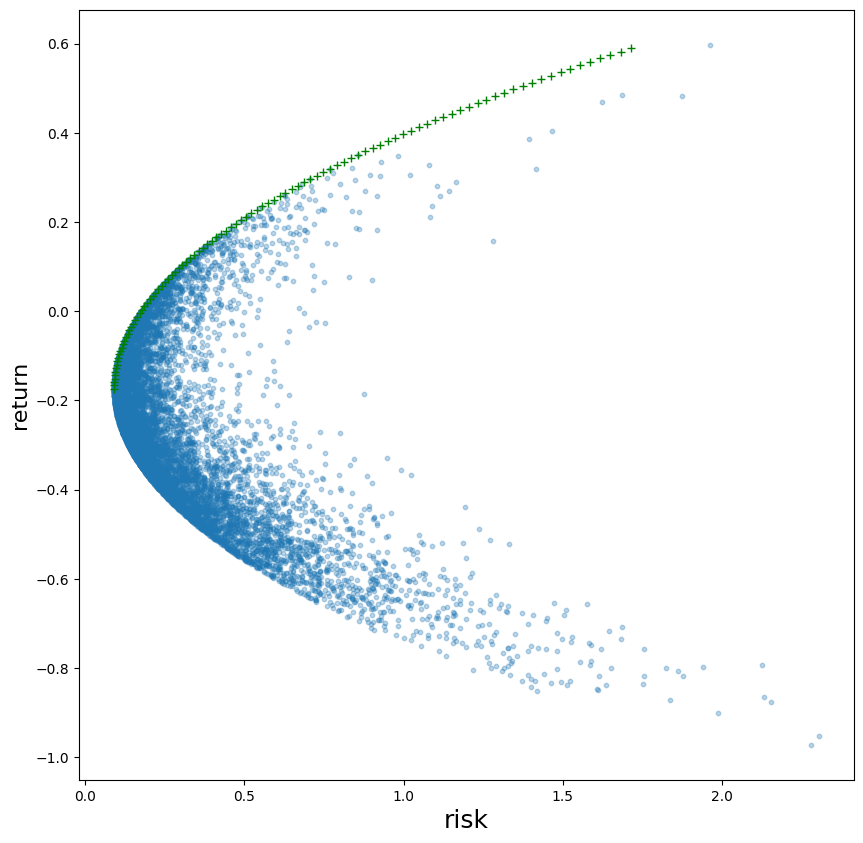

In [35]:
min_var_ret = portfolios.ret.iloc[portfolios.risk.idxmin()]
eff_ret = np.arange(min_var_ret, portfolios.ret.max(),
                    (portfolios.ret.max()-min_var_ret)/100)
eff_risk = np.zeros(len(eff_ret))

cov_mat = np.array(cov_mat)
f = lambda x: x@cov_mat@x.T
x0 = np.array((0,0,0))

for ind in range(len(eff_ret)):
    cons = ({'type': 'eq','fun': lambda x: x[0]+ x[1] + x[2] -1},
            {'type': 'eq', 'fun': lambda x: x@asset_ret - eff_ret[ind]})
    res = minimize(f, x0, constraints=cons)
    eff_risk[ind] = res.fun

plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(eff_risk, eff_ret, color='g', marker='+', linestyle='-', linewidth=1)

## Short-selling with riskless lending and borrowing

Let's construct the efficient frontier with short-selling and also with the risk-lending and borrowing.

1. In this case, we would first find the tangency portfolio and then draw the line from the risk-free asset to the tangency portfolio. That's it. In this case, suppose the risk free rate is -0.00001(daily return, or about $-0.252 \%$ annually).
2. Let's first find the tangency portfolio, which has the largest slope $\theta$. We need to solve the following:
   $$ \max \theta = \frac{E(R_{P})-R_{F}} {\sigma_{P}}$$ $$\mathbf{w1^{'}}=1$$
3. Use solver or simply find the $\theta$ that offers the best sharpe ratio.
4. Next step, is to draw the line. Consider the following formula: $$ R_{P} = R_{F} + \frac{E_R{T}-R_{F}}{\sigma_{T}}\sigma_{P} = R_{F} + \theta\sigma_{P}$$. We already found the tangency portfolio and we have the $\textit{theta}$. The only step that we need to take is to generate different levels of portfolio standard deviation (starting from 0 to some level that we find appropiate) and compute the portfolio returns using the above formula.
5. Draw the efficient frontier with a scatter plot.

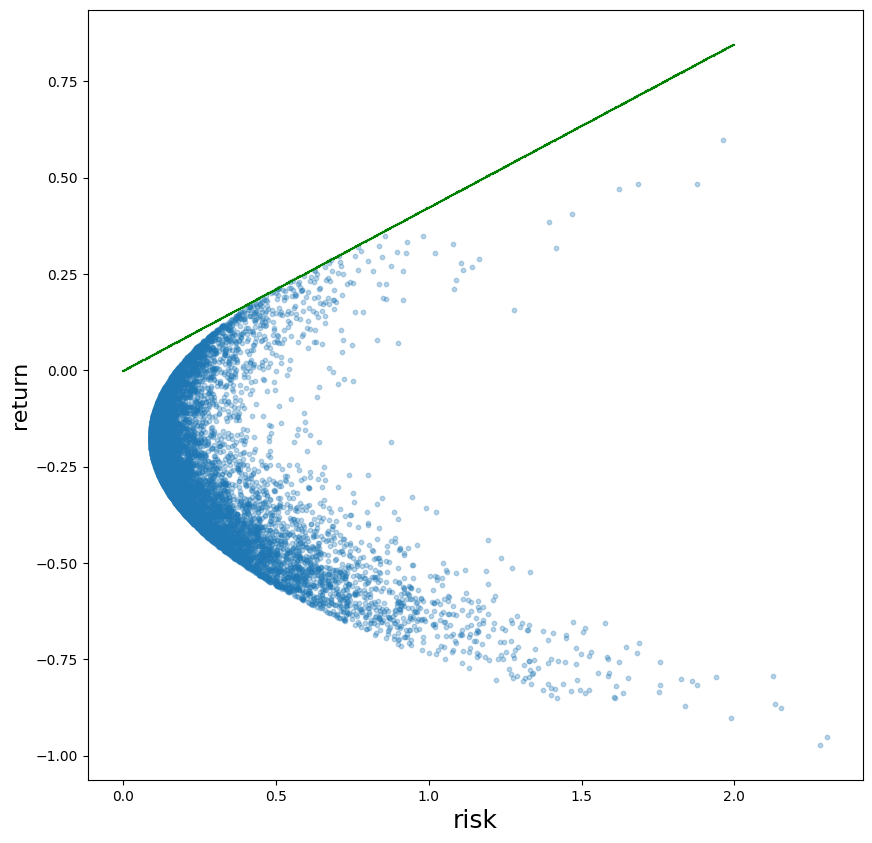

In [36]:
rf = -0.00001 * 252
portfolios['sr'] = (portfolios['ret'] - rf)/ portfolios['risk']

max_sr = portfolios[['sr']].max().to_numpy();
tp_ret  = portfolios.loc[portfolios[['sr']].idxmax(), 'ret']
tp_risk  = portfolios.loc[portfolios[['sr']].idxmax(), 'risk']

cml_x = np.arange(0, 2, 2/1000)
cml_y = rf + cml_x * max_sr

plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(cml_x, cml_y, color='g', marker='+', s=3)